In [1]:
#### 1.Loading_data_for_signature_analysis.R
## 1)Loading cluster results
Cluster.20200201.V7.Tumor <- readRDS("/data8t_4/JH/MyJobs/NormalCancer_TCGA_V2/Cluster.20200201.V7.Tumor.rds")
cutree.res <- Cluster.20200201.V7.Tumor$cutree.res
dynamicColors <- Cluster.20200201.V7.Tumor$dynamicColors
Cluster.df <- cbind(cutree.res,dynamicColors) 
Cluster.df <- as.data.frame(Cluster.df)
Cluster.df$rownames <- rownames(Cluster.df)
table(Cluster.df$dynamicColors)


     blue     brown turquoise    yellow 
      103        47       135         1 


     blue     brown turquoise    yellow 
      105        47       145         2 

[1] "dynamicColors"                "B.cells.naive"               
 [3] "B.cells.memory"               "Plasma.cells"                
 [5] "T.cells.CD8"                  "T.cells.CD4.naive"           
 [7] "T.cells.CD4.memory.resting"   "T.cells.CD4.memory.activated"
 [9] "T.cells.follicular.helper"    "T.cells.regulatory..Tregs."  
[11] "T.cells.gamma.delta"          "NK.cells.resting"            
[13] "NK.cells.activated"           "Monocytes"                   
[15] "Macrophages.M0"               "Macrophages.M1"              
[17] "Macrophages.M2"               "Dendritic.cells.resting"     
[19] "Dendritic.cells.activated"    "Mast.cells.resting"          
[21] "Mast.cells.activated"         "Eosinophils"                 
[23] "Neutrophils"

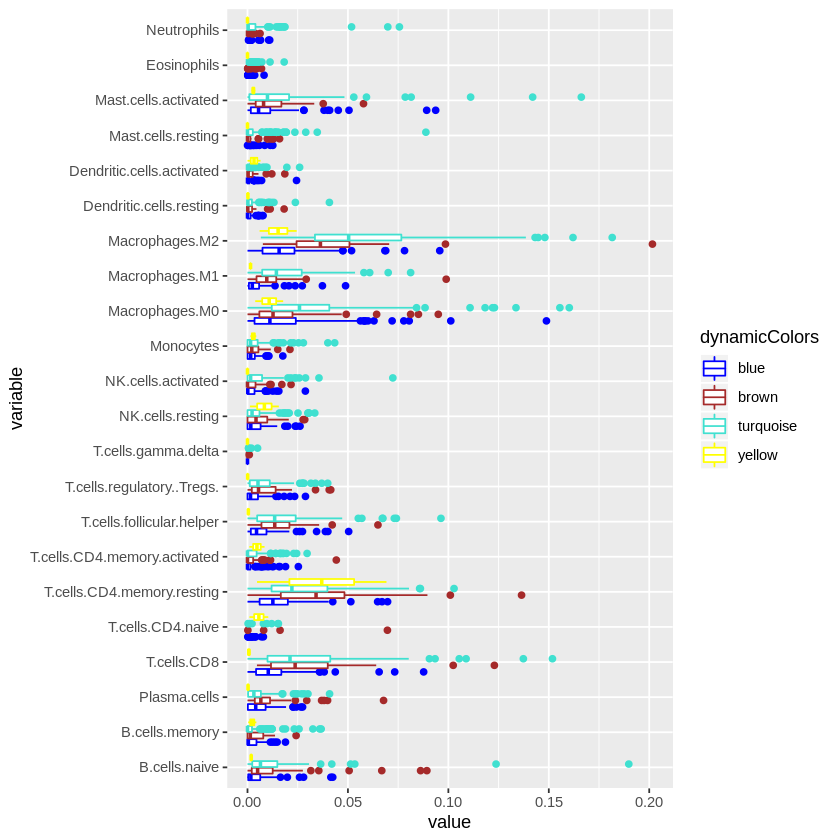

In [4]:
#### 3.Immune_status_analysis_ImmuneCell_Infiltration.R
#### Immuno cell Infiltration ####
### 1) Loading data
### Papaer：Machine Learning Identifies Stemness Features Associated with Oncogenic Dedifferentiation
### https://gdc.cancer.gov/about-data/publications/PanCanStemness-2018
COAD_Machine_Learning_Stemness.ImmuneCell_dataset <- readRDS("/data8t_4/JH/MyJobs/Read_dataset/Machine_Learning_Identifies_Stemness_Features/COAD_Machine_Learning_Stemness.ImmuneCell.cibersort.relative_dataset.rds")
#COAD_Machine_Learning_Stemness.ImmuneCell_dataset$Machine_Learning_Stemness.metadata
COAD_Machine_Learning_StemnessimmuneCell.Absolute <- COAD_Machine_Learning_Stemness.ImmuneCell_dataset$COAD_Machine_Learning_StemnessimmuneCell.Absolute
## 2)Merge table
MergeTable.Machine.Immune <- dplyr::left_join(Cluster.df, COAD_Machine_Learning_StemnessimmuneCell.Absolute, by = "rownames")
table(MergeTable.Machine.Immune$dynamicColors)
#duplicated(MergeTable.Machine.Immune$rownames)
#table(duplicated(Cluster.df$rownames))
#table(duplicated(COAD_Machine_Learning_StemnessimmuneCell.Absolute$rownames))
#COAD_Machine_Learning_StemnessimmuneCell.Absolute[duplicated(COAD_Machine_Learning_StemnessimmuneCell.Absolute$rownames),]
#COAD_Machine_Learning_StemnessimmuneCell.Absolute[COAD_Machine_Learning_StemnessimmuneCell.Absolute$rownames == "TCGA.A6.2672.01",]
#final[complete.cases(final), ]
## 3)Construct ggplot dataframe
#colnames(MergeTable.Machine.Immune)
MergeTable.Machine.Immune_sub<- MergeTable.Machine.Immune[,-c(1,3)]
## Remove NA rows
#MergeTable.Machine.Immune_sub
MergeTable.Machine.Immune_sub <- MergeTable.Machine.Immune_sub[complete.cases(MergeTable.Machine.Immune_sub), ]
colnames(MergeTable.Machine.Immune_sub)
library(reshape2)
MergeTable.Machine.Immune.m <- melt(MergeTable.Machine.Immune_sub,id.vars='dynamicColors')
library(ggplot2)
ggplot(MergeTable.Machine.Immune.m) + geom_boxplot(aes(x=variable, y=value, color=dynamicColors)) + coord_flip()+
  scale_color_manual(values= c("blue","brown","turquoise","yellow"))


     blue     brown turquoise    yellow 
      105        47       143         2 

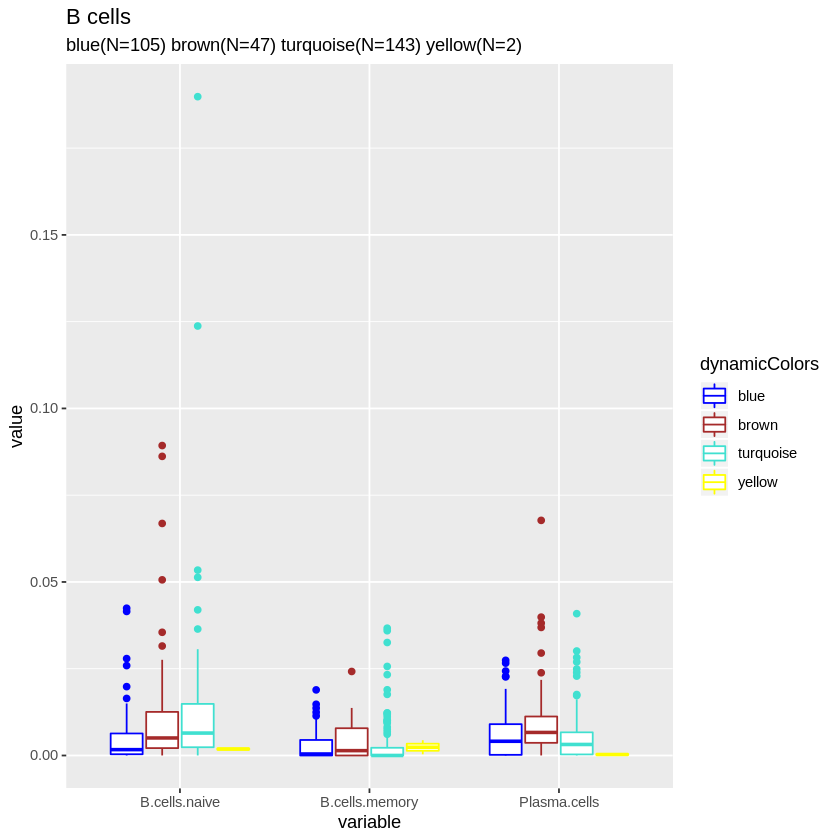

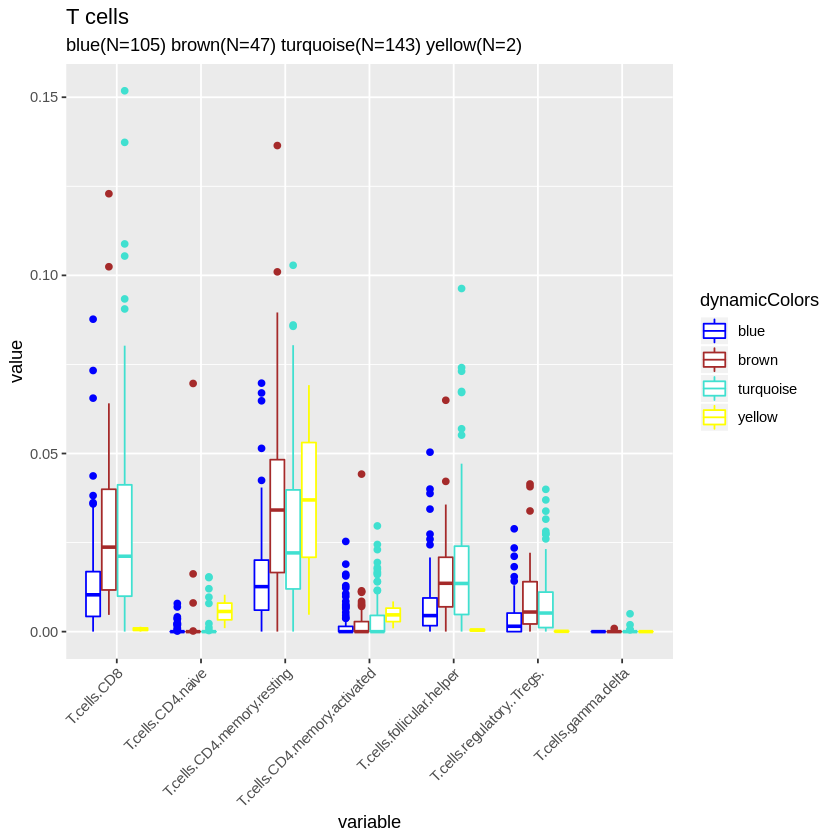

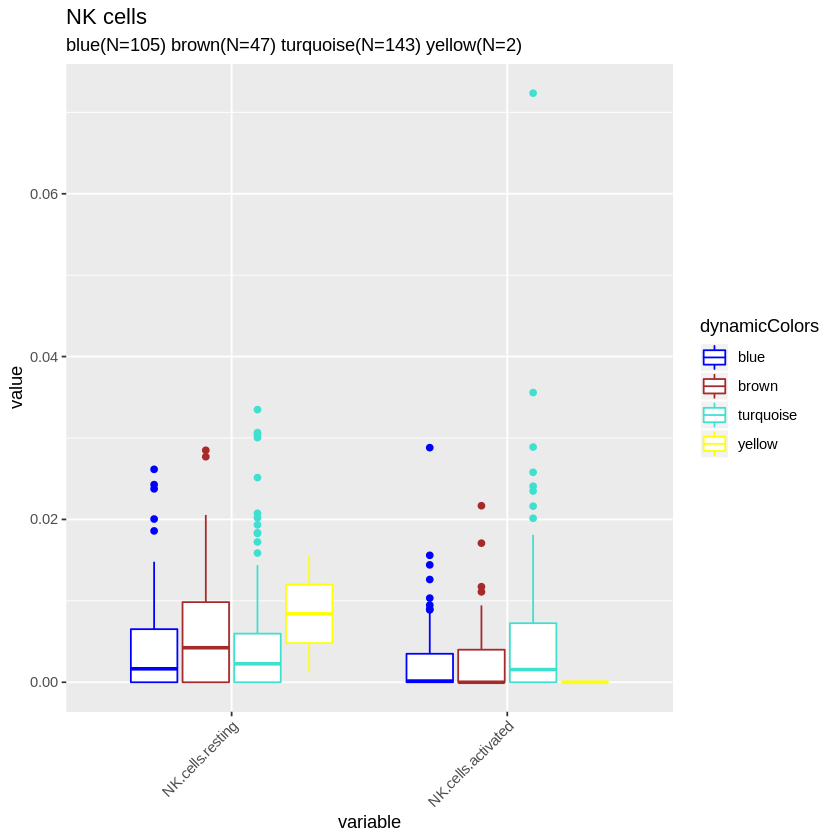

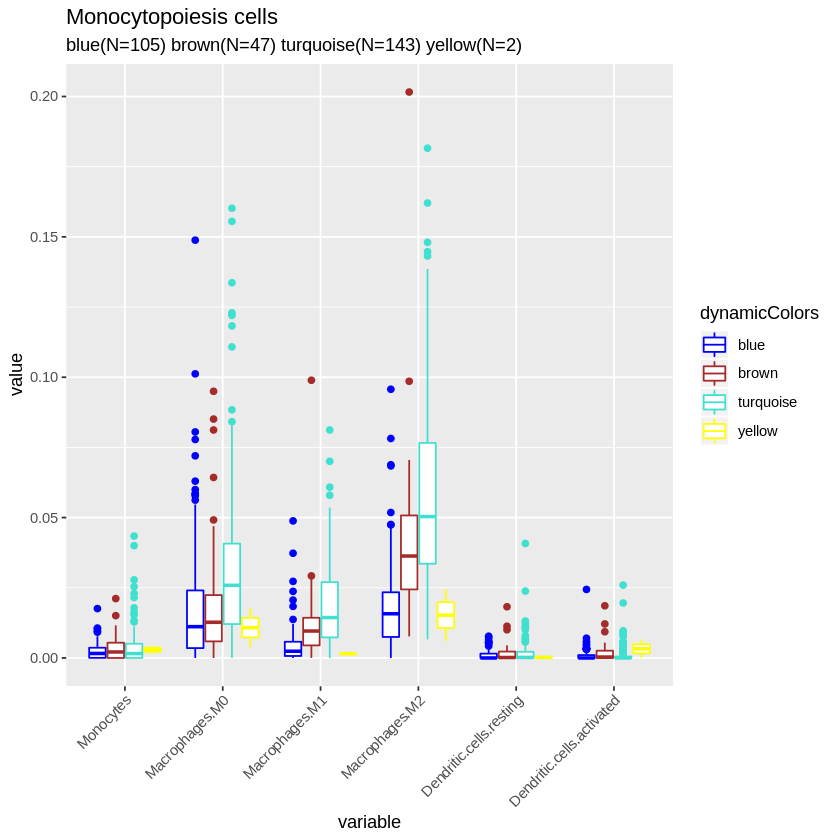

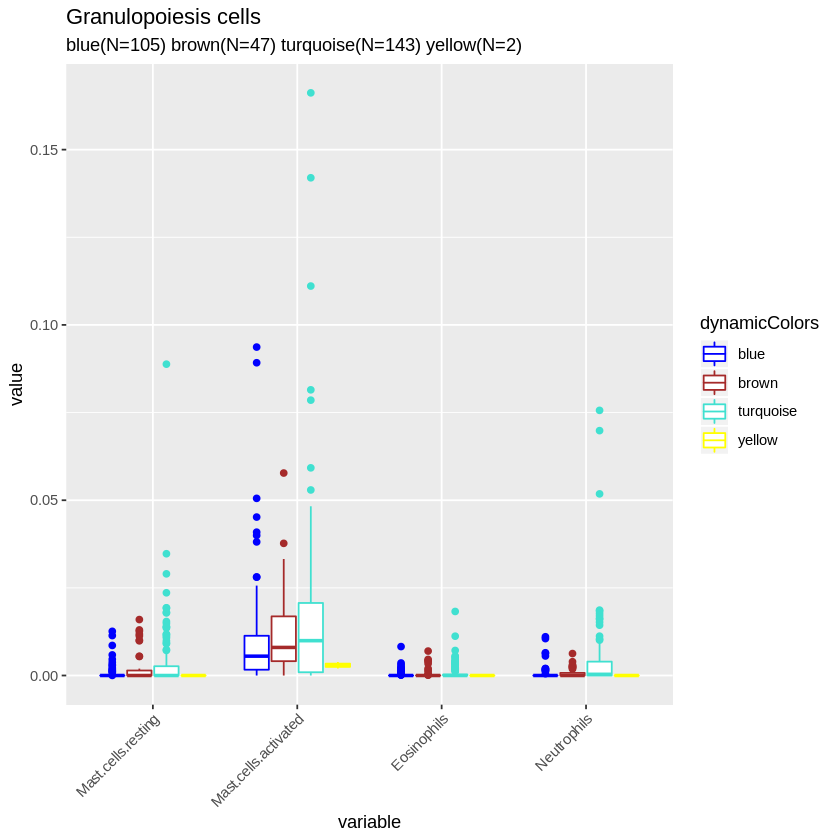

In [6]:
## 4)Cell type plot ##
#colnames(MergeTable.Machine.Immune_sub)
# B cells
table(MergeTable.Machine.Immune_sub$dynamicColors)
sampleSize <- paste(levels(MergeTable.Machine.Immune_sub$dynamicColors),"(N=",table(MergeTable.Machine.Immune_sub$dynamicColors),")",sep="")
sampleSize <- paste(sampleSize,collapse=" ")
dat.m.Bcell <- melt(MergeTable.Machine.Immune_sub[,c(2:4,1)],id.vars='dynamicColors')
ggplot(dat.m.Bcell) + geom_boxplot(aes(x=variable, y=value, color=dynamicColors)) + 
  scale_color_manual(values= c("blue","brown","turquoise","yellow")) +
  labs(title = "B cells",subtitle =sampleSize)
# T cells
dat.m.Tcell <- melt(MergeTable.Machine.Immune_sub[,c(5:11,1)],id.vars='dynamicColors')
ggplot(dat.m.Tcell) + geom_boxplot(aes(x=variable, y=value, color=dynamicColors)) + 
  scale_color_manual(values= c("blue","brown","turquoise","yellow"))+
  labs(title = "T cells",subtitle =sampleSize)+
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
# NK cells
dat.m.NKcell <- melt(MergeTable.Machine.Immune_sub[,c(12:13,1)],id.vars='dynamicColors')
ggplot(dat.m.NKcell) + geom_boxplot(aes(x=variable, y=value, color=dynamicColors)) + 
  scale_color_manual(values= c("blue","brown","turquoise","yellow"))+
  labs(title = "NK cells",subtitle =sampleSize)+
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
# Monocytopoiesis
dat.m.Monocell <- melt(MergeTable.Machine.Immune_sub[,c(14:19,1)],id.vars='dynamicColors')
ggplot(dat.m.Monocell) + geom_boxplot(aes(x=variable, y=value, color=dynamicColors)) +
  scale_color_manual(values= c("blue","brown","turquoise","yellow"))+
  labs(title = "Monocytopoiesis cells",subtitle =sampleSize)+
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
# Granulopoiesis
dat.m.Grancell <- melt(MergeTable.Machine.Immune_sub[,c(20:23,1)],id.vars='dynamicColors')
ggplot(dat.m.Grancell) + geom_boxplot(aes(x=variable, y=value, color=dynamicColors)) + 
  scale_color_manual(values= c("blue","brown","turquoise","yellow"))+
  labs(title = "Granulopoiesis cells",subtitle =sampleSize)+
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
